In [146]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras import optimizers, regularizers, models, layers
from random import shuffle, randint
import numpy as np
from keras.applications import VGG16

import matplotlib.pyplot as plt
import os, shutil
from os import listdir
from os.path import join, isfile, exists
from keras.models import load_model, model_from_json
from pathlib import Path

In [147]:
def make_dir_helper(dir_path):
    if not os.path.exists(dir_path):
        os.mkdir(dir_path)
        return True
    return False

In [148]:
def delete_dir_helper(dir_path):
    if os.path.exists(dir_path):
        shutil.rmtree(dir_path)
        return True
    return False

In [149]:
project_dir_name = 'Esri Project'
original_dataset_dir = join(os.path.expanduser('~'),'Desktop', project_dir_name, 'original data');
base_dir =  join(os.path.expanduser('~'), 'Desktop', project_dir_name, 'data');
base_scripts_dir =  join(os.path.expanduser('~'), 'Desktop', project_dir_name, 'scripts');
model_dir =  join(os.path.expanduser('~'), 'Desktop', project_dir_name, 'models');

MODEL_FILE_NAME = 'map_multi_model.h5'
CLASSES_TO_CLASSIFY = ['Airplane', 'Beach', 'Buildings', 'Forest', 'Freeway', 'Parkinglot']
ext = '.jpg'
IMAGE_SIZE = 150
EPOCHS = 17
NO_TRAINING_SAMPLES = 70
BATCH_SIZE = 15
STEPS_PER_EPOCH = 5

train_dir = join(base_dir, 'train')
validation_dir = join(base_dir, 'validation')
test_dir = join(base_dir, 'test')
model_file_path = join(model_dir, MODEL_FILE_NAME)

# Delete the previous data folder and all its contents
delete_dir_helper(base_dir)

make_dir_helper(base_dir)
make_dir_helper(model_dir)

# Make base directories
make_dir_helper(train_dir)
make_dir_helper(validation_dir)
make_dir_helper(test_dir)

for classes in CLASSES_TO_CLASSIFY:
    
    train_class_dir = join(train_dir, classes)
    validation_class_dir = join(validation_dir, classes)
    test_class_dir = join(test_dir, classes)
    
    # Make train sub directories
    make_dir_helper(train_class_dir)
    make_dir_helper(validation_class_dir)
    make_dir_helper(test_class_dir)
    
    indexes = [i for i in range(100)]
    shuffle(indexes)
    train_indexes = indexes[:70]
    test_indexes = indexes[70:100]
    
    fnames = [(classes + '{}' + ext).format(i) for i in train_indexes]
    for fname in fnames:
        print(fname)
        src_dir = join(original_dataset_dir, fname)
        dst_dir = join(train_class_dir, fname)
        shutil.copyfile(src_dir, dst_dir)

    # Copy classes into the validation dataset
    fnames = [(classes + '{}' + ext).format(i) for i in test_indexes]
    for fname in fnames:
        src_dir = join(original_dataset_dir, fname)
        dst_dir = join(validation_class_dir, fname)
        shutil.copyfile(src_dir, dst_dir)

    # Copy classes into the test dataset
    fnames = [(classes + '{}' + ext).format(i) for i in test_indexes]
    for fname in fnames:
        src_dir = join(original_dataset_dir, fname)
        dst_dir = join(test_class_dir, fname)
        shutil.copyfile(src_dir, dst_dir)

Airplane7.jpg
Airplane38.jpg
Airplane35.jpg
Airplane29.jpg
Airplane10.jpg
Airplane21.jpg
Airplane47.jpg
Airplane87.jpg
Airplane99.jpg
Airplane60.jpg
Airplane76.jpg
Airplane83.jpg
Airplane91.jpg
Airplane77.jpg
Airplane58.jpg
Airplane30.jpg
Airplane4.jpg
Airplane85.jpg
Airplane53.jpg
Airplane13.jpg
Airplane44.jpg
Airplane34.jpg
Airplane96.jpg
Airplane82.jpg
Airplane95.jpg
Airplane45.jpg
Airplane93.jpg
Airplane64.jpg
Airplane61.jpg
Airplane69.jpg
Airplane98.jpg
Airplane56.jpg
Airplane94.jpg
Airplane8.jpg
Airplane55.jpg
Airplane25.jpg
Airplane40.jpg
Airplane20.jpg
Airplane92.jpg
Airplane63.jpg
Airplane37.jpg
Airplane36.jpg
Airplane67.jpg
Airplane68.jpg
Airplane27.jpg
Airplane31.jpg
Airplane81.jpg
Airplane74.jpg
Airplane22.jpg
Airplane73.jpg
Airplane66.jpg
Airplane88.jpg
Airplane18.jpg
Airplane11.jpg
Airplane75.jpg
Airplane28.jpg
Airplane62.jpg
Airplane57.jpg
Airplane59.jpg
Airplane2.jpg
Airplane15.jpg
Airplane42.jpg
Airplane26.jpg
Airplane23.jpg
Airplane1.jpg
Airplane80.jpg
Airplane72.jpg


In [150]:
is_model_from_file = False
model = None
if exists(model_file_path):
    print('found model!')
    model = load_model(model_file_path)
    is_model_from_file = True
else:
    print('No saved model')

found model!


In [151]:
    train_datagen = ImageDataGenerator(rescale=1./255,
                                       vertical_flip=True,
                                       shear_range=0.2,
                                       zoom_range=0.2,
                                       rotation_range=40,
                                       width_shift_range=0.2,
                                       height_shift_range=0.2,
                                       horizontal_flip=True)  
    test_datagen = ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_directory(
            train_dir,  
            target_size=(IMAGE_SIZE, IMAGE_SIZE),  
            batch_size=BATCH_SIZE,
            class_mode='categorical')  

    validation_generator = test_datagen.flow_from_directory(
            validation_dir,
            target_size=(IMAGE_SIZE, IMAGE_SIZE),
            batch_size=BATCH_SIZE,
            class_mode='categorical')

Found 420 images belonging to 6 classes.
Found 180 images belonging to 6 classes.


In [152]:
    for idx, (data_batch, labels_batch) in enumerate(train_generator):
        print('data batch:', data_batch.shape)
        print('labels batch:', labels_batch.shape)

        if idx > 3:
            break

data batch: (15, 150, 150, 3)
labels batch: (15, 6)
data batch: (15, 150, 150, 3)
labels batch: (15, 6)
data batch: (15, 150, 150, 3)
labels batch: (15, 6)
data batch: (15, 150, 150, 3)
labels batch: (15, 6)
data batch: (15, 150, 150, 3)
labels batch: (15, 6)


In [153]:
#     model = models.Sequential()
#     model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
#     model.add(layers.MaxPooling2D((2, 2)))
#     model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
#     model.add(layers.MaxPooling2D((2, 2)))
#     model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
#     model.add(layers.MaxPooling2D((2, 2)))
#     model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
#     model.add(layers.MaxPooling2D((2, 2)))
#     model.add(conv_base)
#     model.add(layers.Flatten())
#     model.add(layers.Dropout(0.5))
#     model.add(layers.Dense(64, activation='relu'))
#     model.add(layers.Dense(6, activation='softmax'))

In [154]:
    model = models.Sequential()
    conv_base = VGG16(weights='imagenet' ,include_top=False, input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    conv_base.trainable = False
    model.add(conv_base)
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(6, activation='sigmoid'))

In [155]:
model.compile(loss='categorical_crossentropy',
            optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

In [156]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_4 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 6)                 1542      
Total params: 16,813,638
Trainable params: 2,098,950
Non-trainable params: 14,714,688
_________________________________________________________________


In [157]:
if not is_model_from_file:
    history = model.fit_generator(
          train_generator,
          steps_per_epoch=10,
          epochs=EPOCHS,
          validation_data=validation_generator,
          validation_steps=10)

    model.save(model_file_path) 

    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'b+')
    plt.plot(epochs, val_acc, 'bo')
    plt.title('Training and validation accuracy')

    plt.figure()

    plt.plot(epochs, loss, 'b+')
    plt.plot(epochs, val_loss, 'bo')
    plt.title('Training and validation loss')

    plt.show()

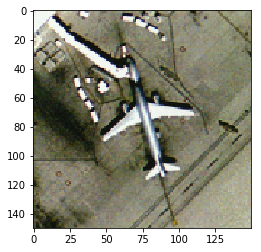

[  1.00000000e+00   9.99999642e-01   9.95929658e-01   7.74853706e-01
   5.54392100e-05   2.87454858e-17]
[0]
Airplane


In [166]:
fnames = []
target_dir = test_dir
dnames = [os.path.join(target_dir, dname) for dname in os.listdir(target_dir)]
for dname in dnames:
    fnames.extend([os.path.join(dname, fname) for fname in os.listdir(dname)])
fnames
shuffle(fnames)
img_path = fnames[randint(0, len(fnames))]

img = image.load_img(img_path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
imgplot = plt.imshow(img)
plt.show()

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
prediction = model.predict(x)[0]
print(prediction)

max_indexes = (np.argwhere(prediction == np.amax(prediction))).flatten()
print(max_indexes)

for idx in max_indexes:
    if prediction[idx] > 0.8:
        print(CLASSES_TO_CLASSIFY[idx])
    else:
        print('Unknown')

In [ ]:
def split_into_dir(image_name, dir_path)